<b> Step 0. Importing RFCAN module</b>

In [1]:
from rfcan import rf_qc, make_rf, make_db
from obspy import UTCDateTime

<b>Step 1. Making Database</b>

In [ ]:
#CN --> ['BLKN', 'FCC', 'IGL', 'ILON']
#PO --> ['AP3N', 'ARVN', 'BULN', 'GIFN', 'IGLN', 'ILON', 'JOSN', 'KUGN', 'LAIN', 'MCMN', 'NUNN', 'QILN', 'SEDN', 'SMLN', 'SRLN', 'STLN', 'WAGN', 'YBKN', 'YRTN']
#X5 --> ['CRLN', 'CTSN', 'SHMN', 'SHWN']

input_values_making_db = {"db_name": "DB",                                       # database name
                "network_list": ["CN"],                                   #['CN', 'PO', 'SY', 'X5']
                "station_list": ["BLKN"],            #['BLKN', 'FCC', 'IGL', 'ILON']
                 "starttime": UTCDateTime("2000-01-01T01:00:00.000"),
                 "endtime": UTCDateTime("2025-01-01T01:00:00.000"),
                 "location_box": [55, 70, -100, -80],                     # [minlat, maxlat, minlon, maxlon]
                 "event_radius": [62.5, -90, 30, 90],                     # [centerlat, centerlon, minradius, maxradius]
                 "minmag": 6.0,                                           # minimum magnitude
                 "maxmag": 9.0,                                           # maximum magnitude 
                 "siglen": 1800,                                          # signal length
                 }

Nunavut_Project = make_db(input_values_making_db)               # if you already have your data, event and inventory files, you can skip getwaveforms and complete_by_nrcan functions and report
Nunavut_Project.get_waveforms_bulk()
Nunavut_Project.complete_by_nrcan(notif = False)            # if you want to complete your data by nrcan, you can use this function
Nunavut_Project.report()
Nunavut_Project.cleaning_empty_directories()

<b> Step 2. Making RF files </b>

In [2]:
inputs_values_making_rf = {"db_name": "DB",
            "path_file_name": "01_paths.txt",
            "rotate_aligment": "ZRT",
            "inventory_path": "inventory_CN_2000-2025.xml"                    # !!!! to ensure you are right about the inventory, read the name of the file in the db_name folder
            }

Nunavut_project_RF = make_rf(inputs_values_making_rf)
Nunavut_project_RF.make_rf_by_rfpy()
Nunavut_project_RF.rf_report()

Important Messege! The SNR value is being stored in user0 of sac headers.
If there are already RFs for an event, they will be deleted and new RFs will be created.
RF file(s) already exist(s) for DB/CN_BLKN/2022_1_3.9_46_35_. Deleted and new RFs will be created.
{'time': UTCDateTime(2022, 1, 3, 9, 46, 35, 666000), 'lon': 122.2595, 'lat': 23.9938, 'dep': 19.0, 'mag': 6.2, 'epi_dist': 9670.551289895044, 'az': 15.607766753250846, 'baz': 325.53114263814217, 'gac': 86.96935716147861, 'ttime': 763.8140554561456, 'slow': 0.04372480523016446, 'inc': 14.66454226682065, 'phase': 'P', 'accept': True, 'vp': 6.0, 'vs': 3.5, 'align': 'ZRT', 'rotated': True, 'snr': 6.284921212910101, 'snrh': 1.1316231422349685, 'cc': None}
RF file(s) already exist(s) for DB/CN_BLKN/2019_11_26.2_54_12_. Deleted and new RFs will be created.
{'time': UTCDateTime(2019, 11, 26, 2, 54, 12, 620000), 'lon': 19.5212, 'lat': 41.5149, 'dep': 20.0, 'mag': 6.4, 'epi_dist': 6999.8559096514, 'az': 333.88790787321994, 'baz': 49.42119

<b> Step 3. Doing QC using first SNR and second by eyes</b>

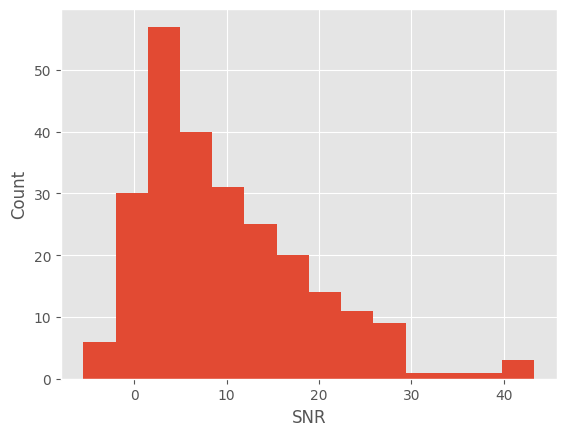

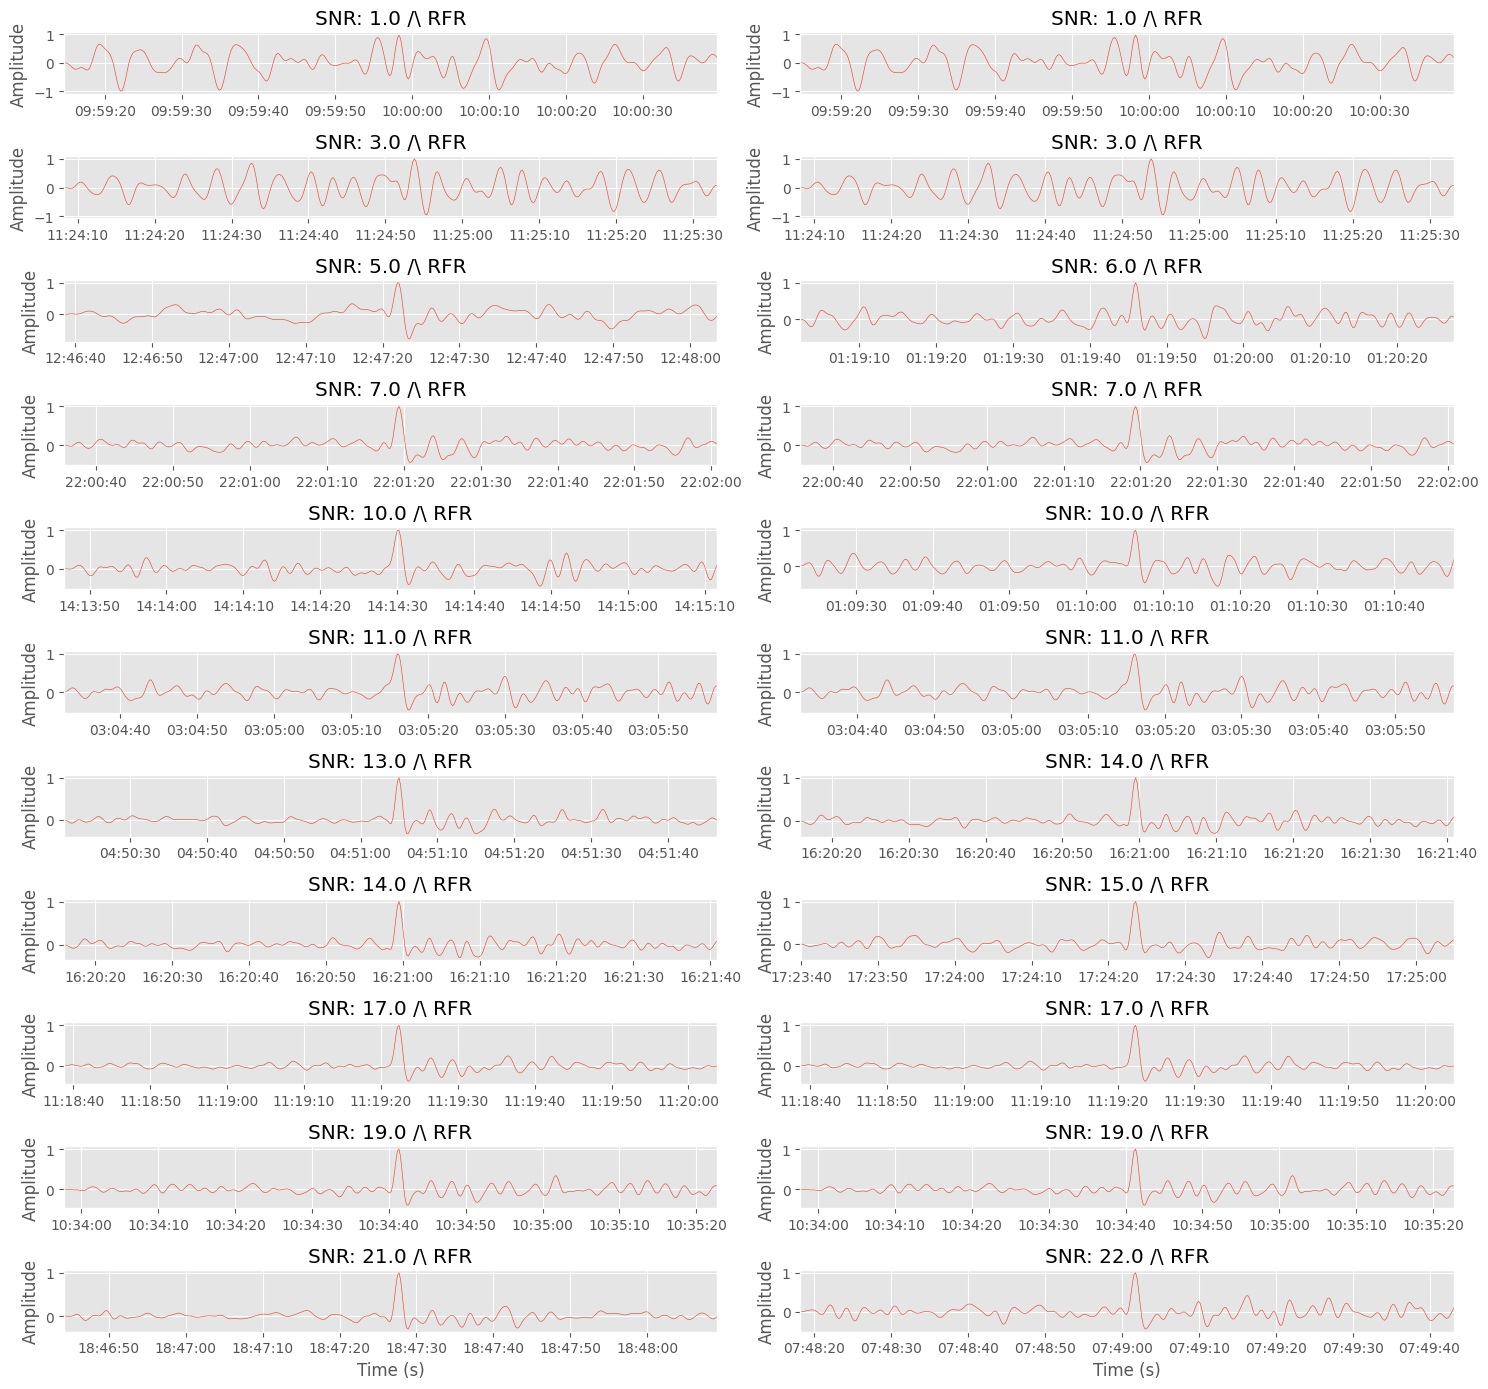

In [3]:
input_values_for_qc = {"db_name": "DB",
                       "sorting_qc_list": "snr_R",
                       "hist_bin_number": 14,
                       "number_snr_plots": 22
                       }

Nunavut_project_qc = rf_qc(input_values_for_qc)
Nunavut_project_qc.snr_hist()
Nunavut_project_qc.visualize_snr()
Nunavut_project_qc.snr_threshold_report(5.5)   #here you can change the threshold


<b> Step 3.1. Doing QC manually </b>

In [5]:
Nunavut_project_qc.QC_by_eye()

working on previous QC list...
percentage of remaining: 0.0 %


Using code below, you are able to see each category of quality:

                 snr_Z
QC_QUAL NET_STA       
1       CN_BLKN     85
2       CN_BLKN     14
3       CN_BLKN     54


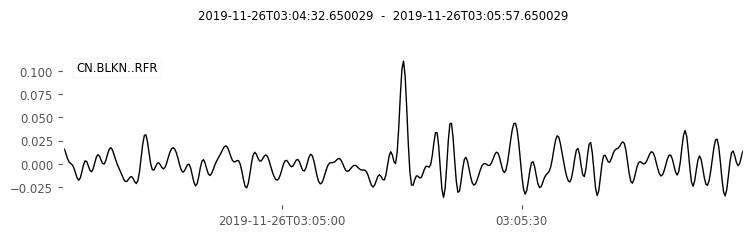

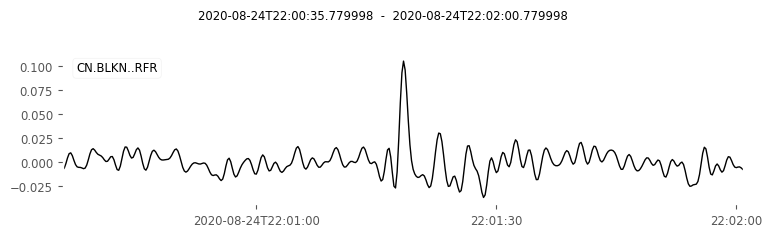

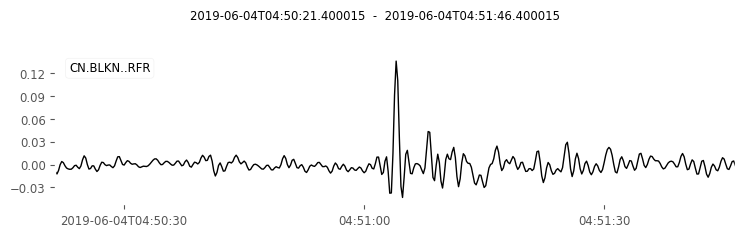

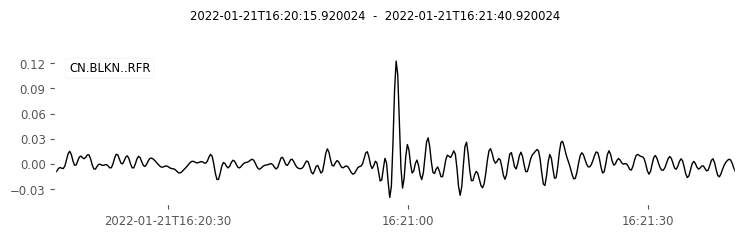

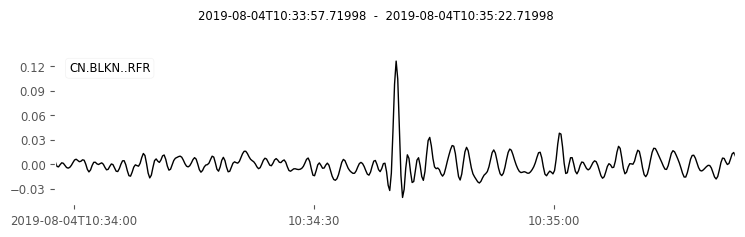

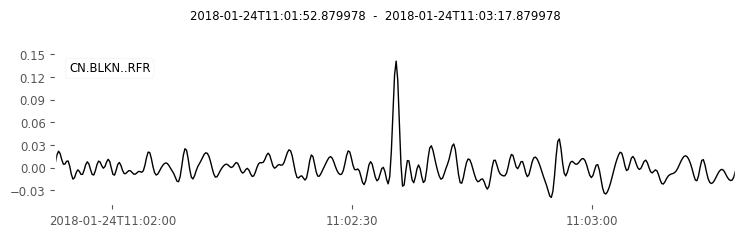

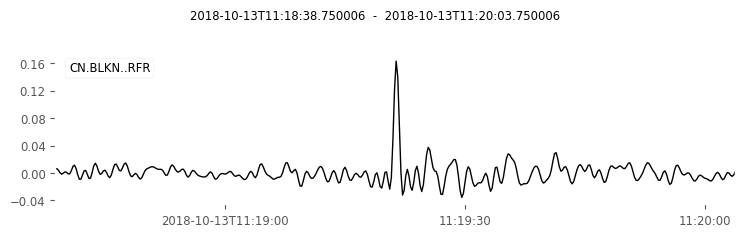

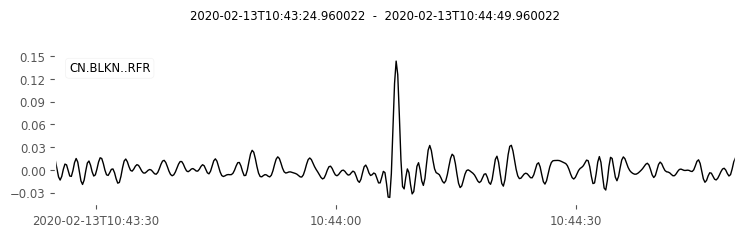

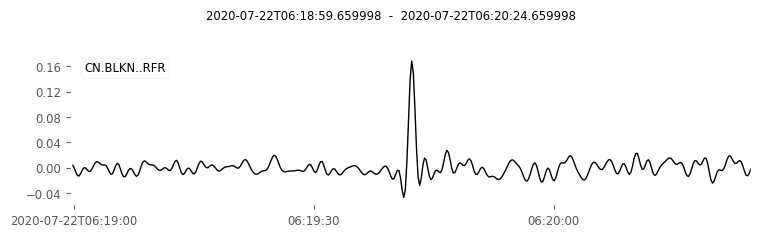

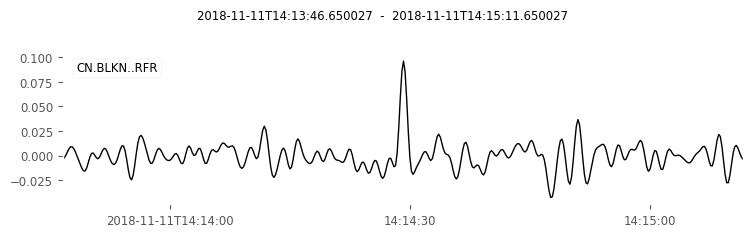

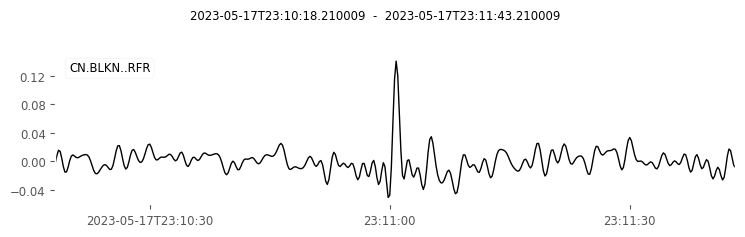

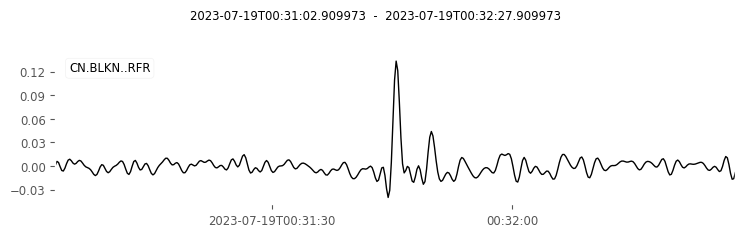

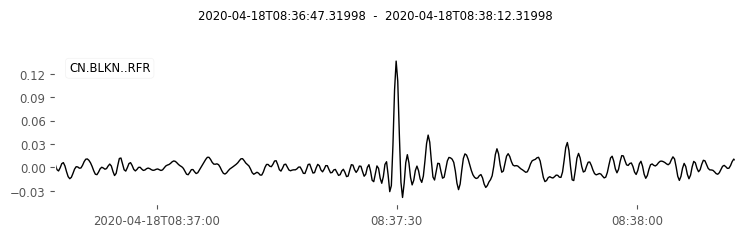

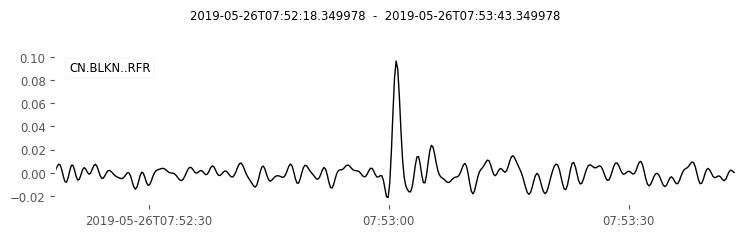

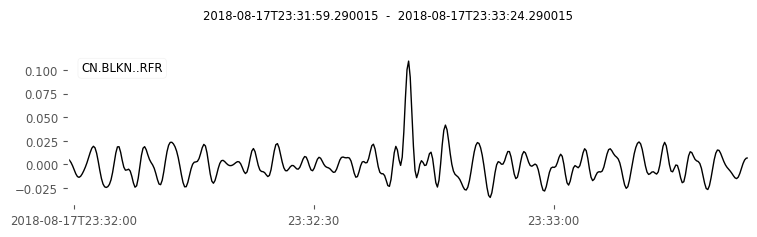

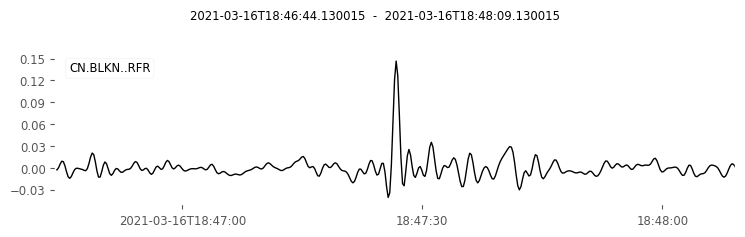

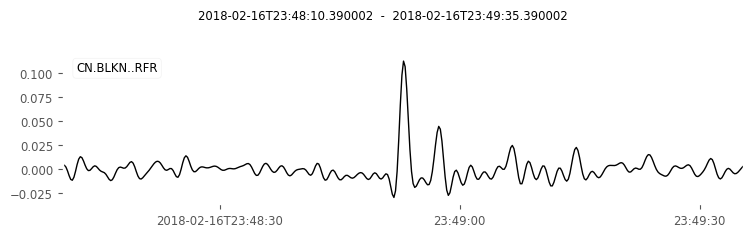

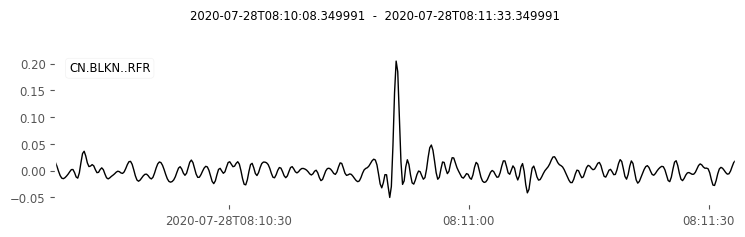

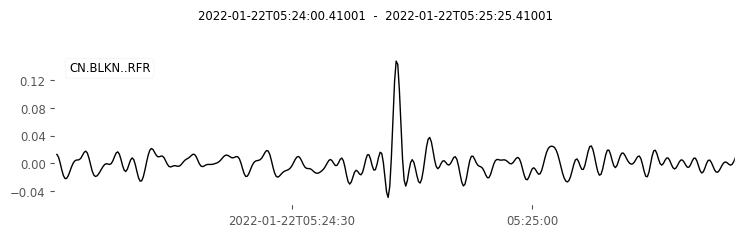

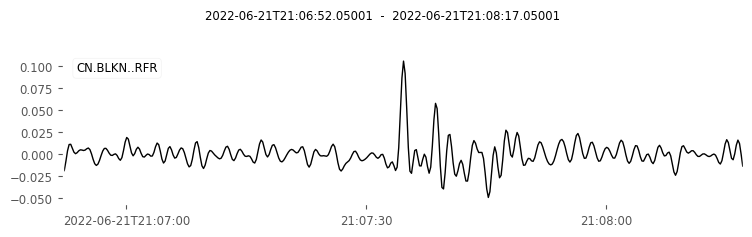

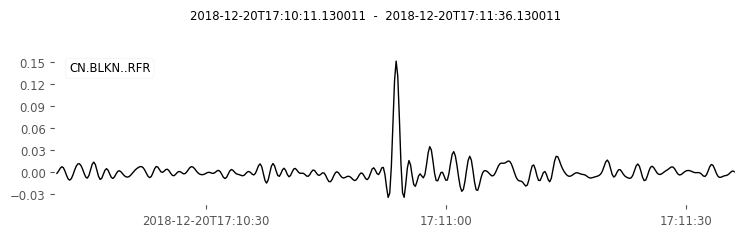

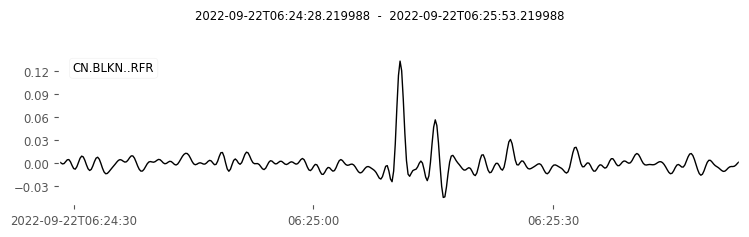

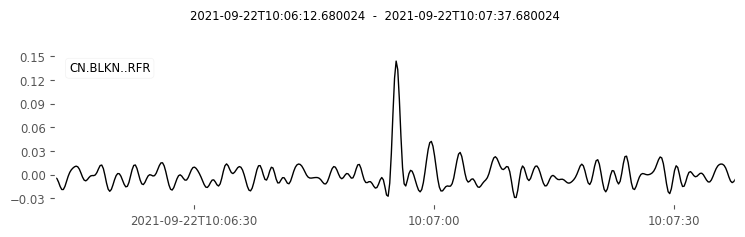

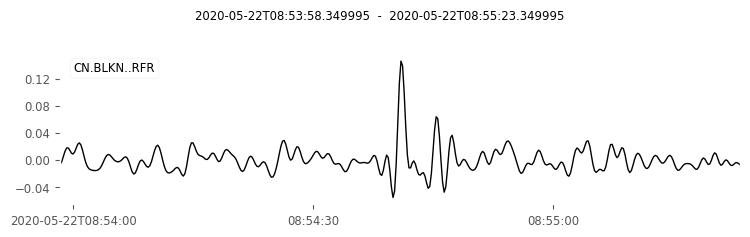

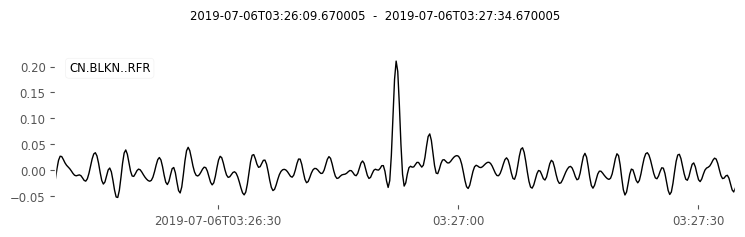

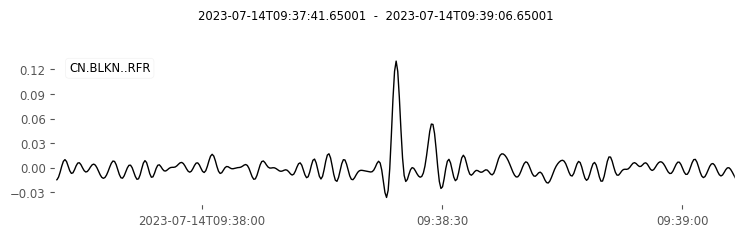

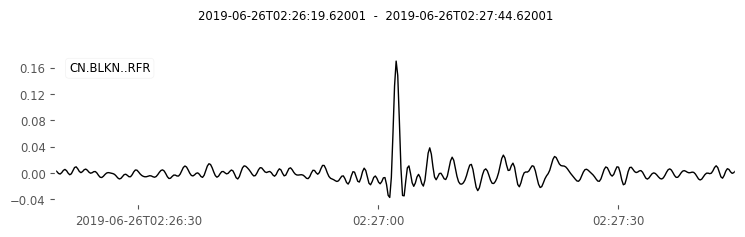

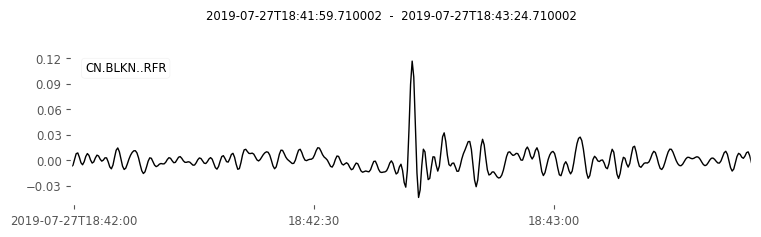

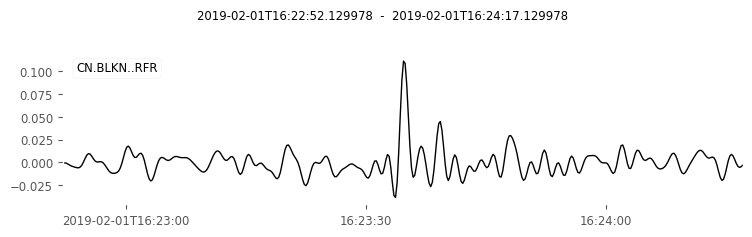

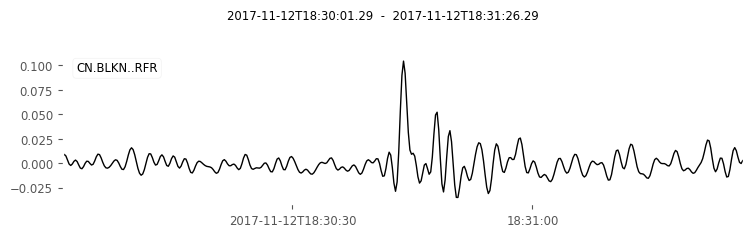

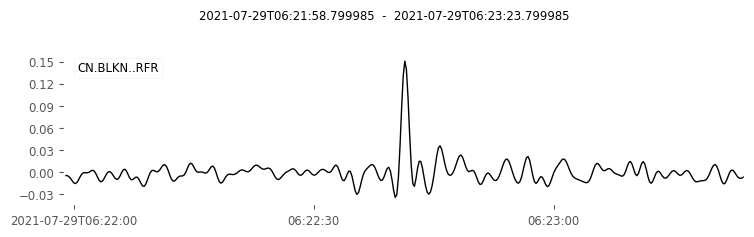

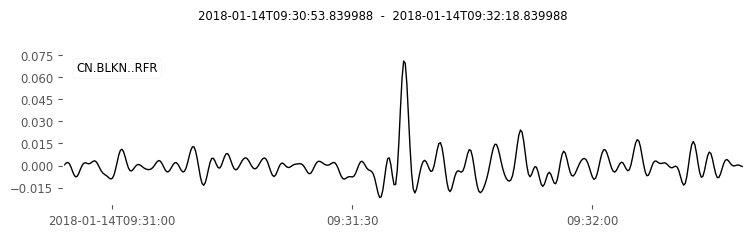

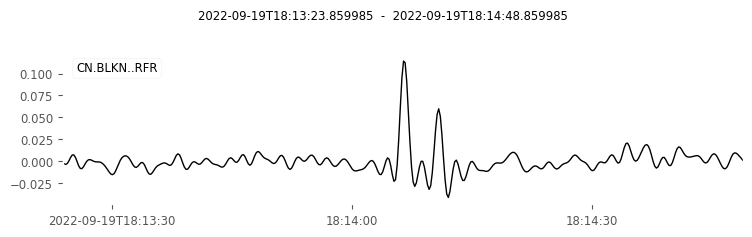

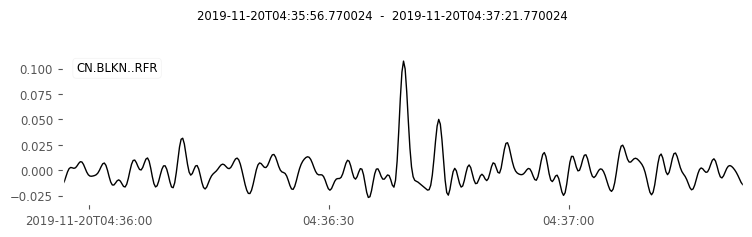

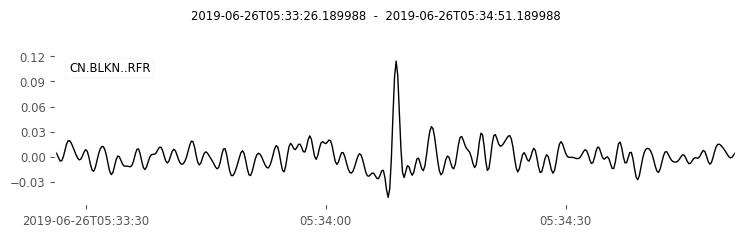

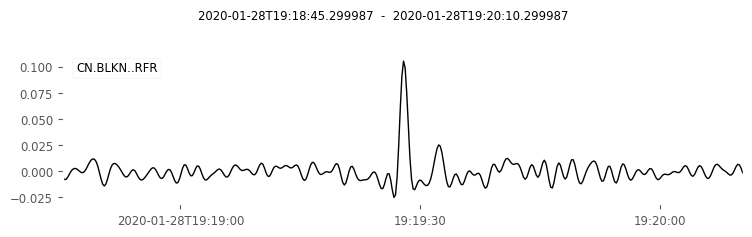

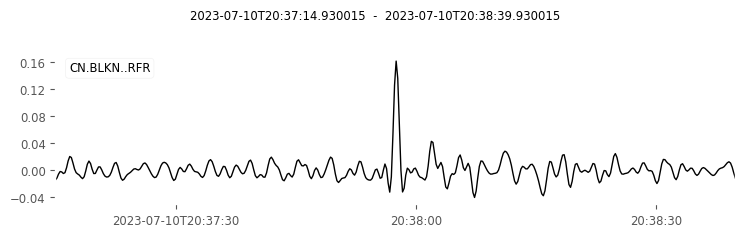

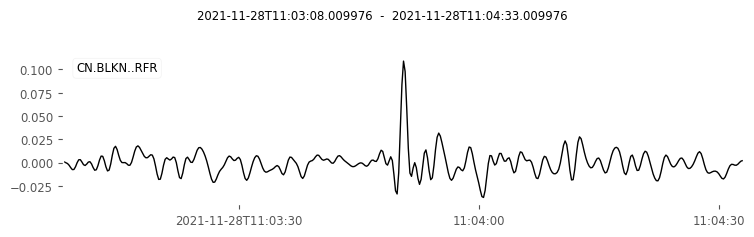

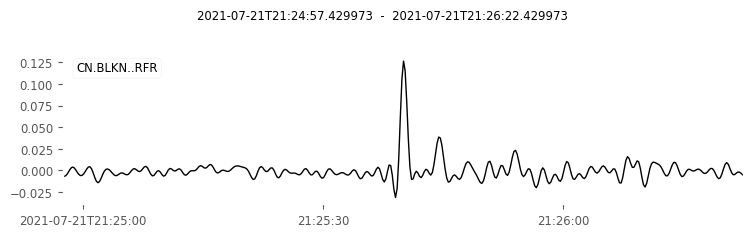

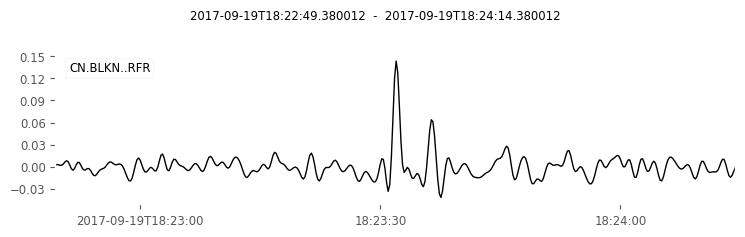

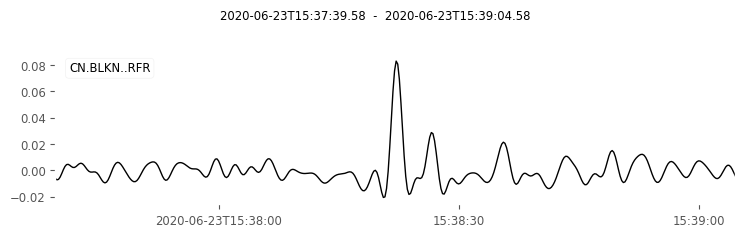

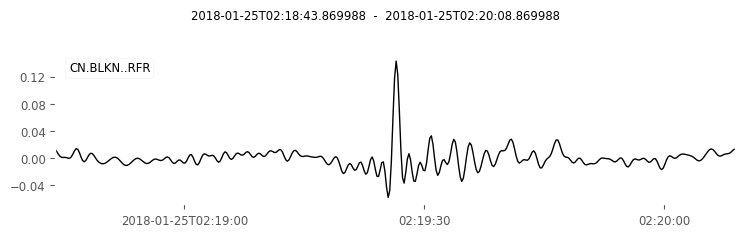

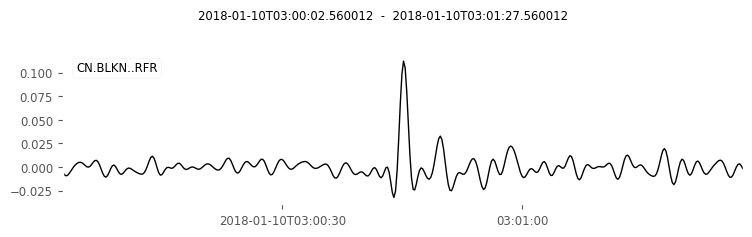

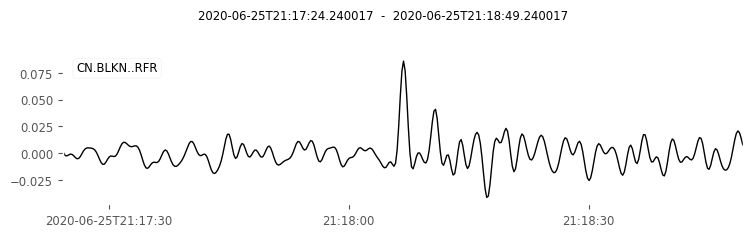

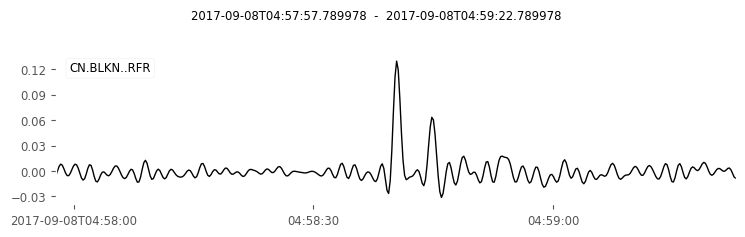

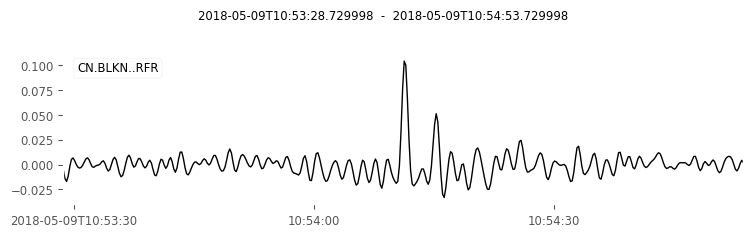

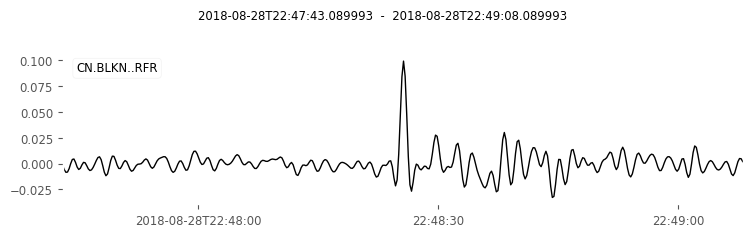

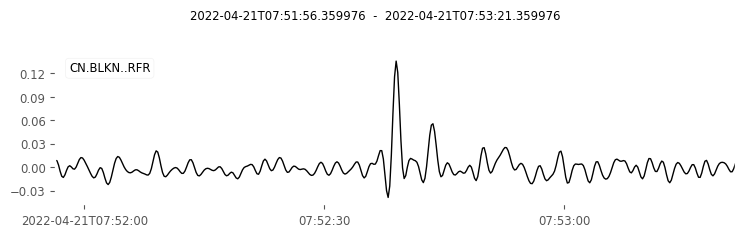

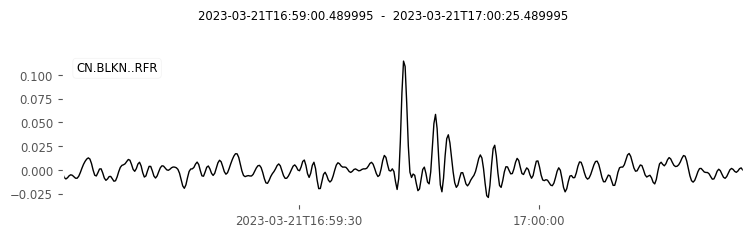

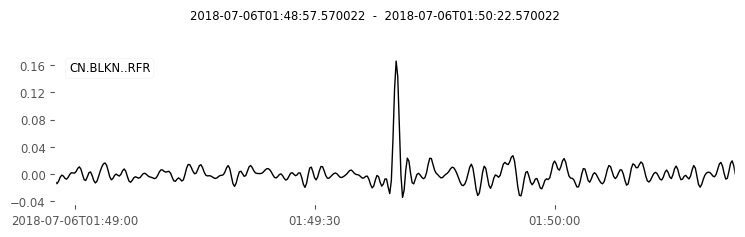

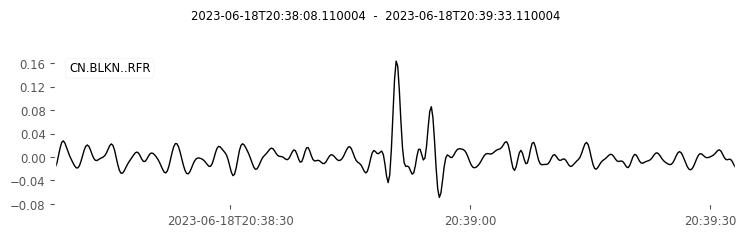

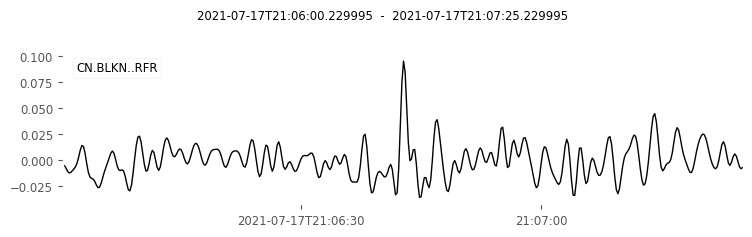

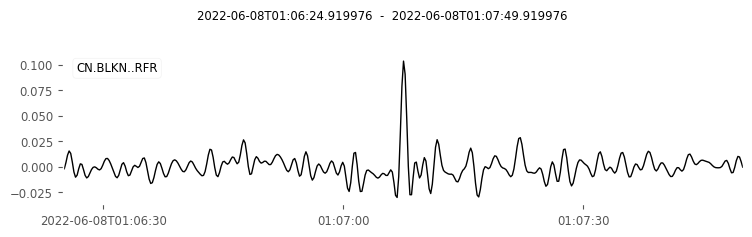

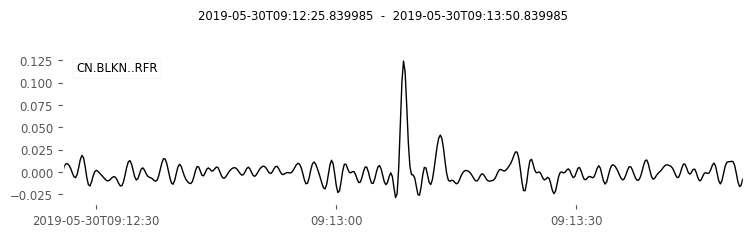

In [6]:
import rfcan 
input_stats_and_viz = {"which_quality": 3,     # 1: low, 2: medium, 3: high
                        "db_name": "DB"}

QC_list_stats = rfcan.rf_stats(input_stats_and_viz)
print(QC_list_stats)
#saving qulaity 3 in a file
rfcan.rf_viz(input_stats_and_viz)
